In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset (replace with your CSV file path)
df = pd.read_csv('HDFC Bank.csv')

# Ensure 'Date' column is in datetime format
"""df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
"""
# Parameters for the Moving Averages
short_window = 50  # Short-term moving average (e.g., 50-period)
long_window = 200  # Long-term moving average (e.g., 200-period)

# Calculate the Short and Long Moving Averages
df['Short_MA'] = df['Close'].rolling(window=short_window, min_periods=1).mean()
df['Long_MA'] = df['Close'].rolling(window=long_window, min_periods=1).mean()

# Create a column for buy/sell signals: 1 = Buy, -1 = Sell, 0 = Hold
df['Signal'] = 0
df['Signal'][short_window:] = np.where(df['Short_MA'][short_window:] > df['Long_MA'][short_window:], 1, 0)  # Buy Signal
df['Signal'][short_window:] = np.where(df['Short_MA'][short_window:] < df['Long_MA'][short_window:], -1, df['Signal'][short_window:])  # Sell Signal

# Calculate the Returns (Buy at next day's open)
df['Returns'] = df['Close'].pct_change() * df['Signal'].shift(1)  # Returns are based on previous day's signal

# Cumulative returns to see overall strategy performance
df['Cumulative_Returns'] = (1 + df['Returns']).cumprod()

# Visualize the results
plt.figure(figsize=(12, 6))

# Plot Closing Price and Moving Averages
plt.subplot(2, 1, 1)
plt.plot(df['Close'], label='Close Price')
plt.plot(df['Short_MA'], label=f'{short_window}-day Moving Average')
plt.plot(df['Long_MA'], label=f'{long_window}-day Moving Average')
plt.title('Stock Price and Moving Averages')
plt.legend()

# Plot Cumulative Returns
plt.subplot(2, 1, 2)
plt.plot(df['Cumulative_Returns'], label='Cumulative Returns', color='green')
plt.title('Cumulative Returns of Moving Average Crossover Strategy')
plt.legend()

plt.tight_layout()
plt.show()

# Print the final performance
print(f"Final Cumulative Return: {df['Cumulative_Returns'].iloc[-1]:.2f}")
print(f"Total Number of Trades: {df['Signal'].value_counts()}")


DataError: No numeric types to aggregate

C:\Users\user\AppData\Local\Temp\ipykernel_18768\4092177665.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Signal'][short_window:] = np.where(df['Short_MA'][short_window:] > df['Long_MA'][short_window:], 1, 0)  # Buy Signal
C:\Users\user\AppData\Local\Temp\ipykernel_18768\4092177665.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Signal'][short_window:] = np.where(df['Short_MA'][short_window:] < df['Long_MA'][short_window:], -1, df['Signal'][short_window:])  # Sell Signal


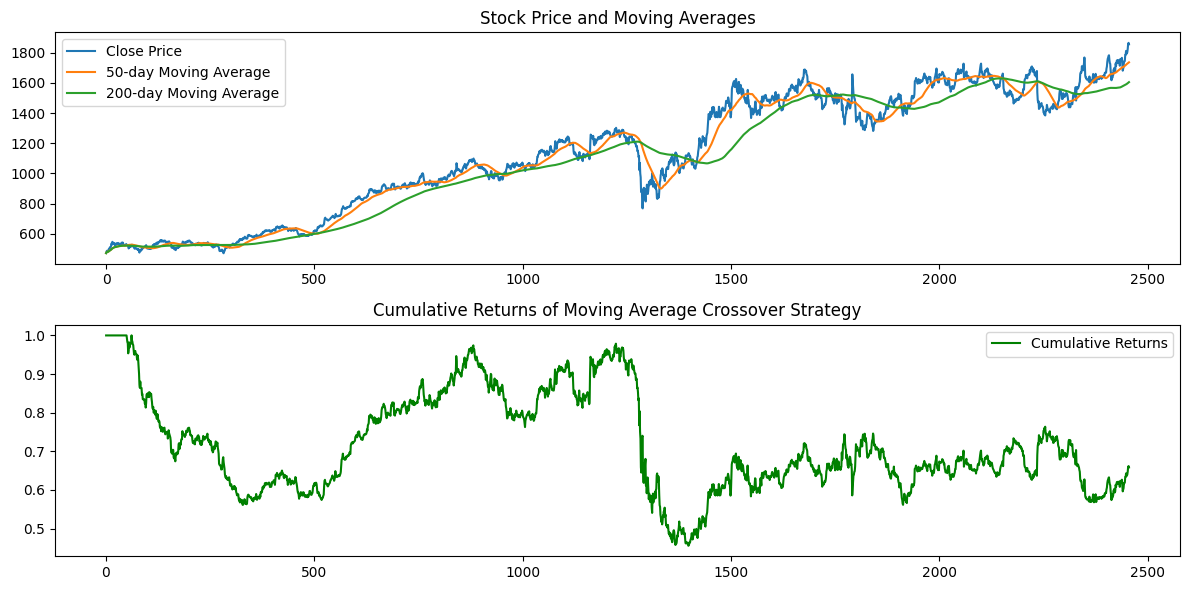

Final Cumulative Return: 0.66
Total Number of Trades: Signal
 1    1773
-1     633
 0      50
Name: count, dtype: int64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset (replace with your CSV file path)
df = pd.read_csv('HDFC Bank.csv')

# Clean the 'Close' and other numeric columns by removing commas and converting to float
df['Close'] = df['Close'].replace({',': ''}, regex=True).astype(float)

# Ensure 'Date' column is in datetime format

"""df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)"""

# Parameters for the Moving Averages
short_window = 50  # Short-term moving average (e.g., 50-period)
long_window = 200  # Long-term moving average (e.g., 200-period)

# Calculate the Short and Long Moving Averages
df['Short_MA'] = df['Close'].rolling(window=short_window, min_periods=1).mean()
df['Long_MA'] = df['Close'].rolling(window=long_window, min_periods=1).mean()

# Create a column for buy/sell signals: 1 = Buy, -1 = Sell, 0 = Hold
df['Signal'] = 0
df['Signal'][short_window:] = np.where(df['Short_MA'][short_window:] > df['Long_MA'][short_window:], 1, 0)  # Buy Signal
df['Signal'][short_window:] = np.where(df['Short_MA'][short_window:] < df['Long_MA'][short_window:], -1, df['Signal'][short_window:])  # Sell Signal

# Calculate the Returns (Buy at next day's open)
df['Returns'] = df['Close'].pct_change() * df['Signal'].shift(1)  # Returns are based on previous day's signal

# Cumulative returns to see overall strategy performance
df['Cumulative_Returns'] = (1 + df['Returns']).cumprod()

# Visualize the results
plt.figure(figsize=(12, 6))

# Plot Closing Price and Moving Averages
plt.subplot(2, 1, 1)
plt.plot(df['Close'], label='Close Price')
plt.plot(df['Short_MA'], label=f'{short_window}-day Moving Average')
plt.plot(df['Long_MA'], label=f'{long_window}-day Moving Average')
plt.title('Stock Price and Moving Averages')
plt.legend()

# Plot Cumulative Returns
plt.subplot(2, 1, 2)
plt.plot(df['Cumulative_Returns'], label='Cumulative Returns', color='green')
plt.title('Cumulative Returns of Moving Average Crossover Strategy')
plt.legend()

plt.tight_layout()
plt.show()

# Print the final performance
print(f"Final Cumulative Return: {df['Cumulative_Returns'].iloc[-1]:.2f}")
print(f"Total Number of Trades: {df['Signal'].value_counts()}")


C:\Users\user\AppData\Local\Temp\ipykernel_18768\969174450.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Signal'][short_window:] = np.where(df['Short_MA'][short_window:] > df['Long_MA'][short_window:], 1, 0)  # Buy Signal
C:\Users\user\AppData\Local\Temp\ipykernel_18768\969174450.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Signal'][short_window:] = np.where(df['Short_MA'][short_window:] < df['Long_MA'][short_window:], -1, df['Signal'][short_window:])  # Sell Signal


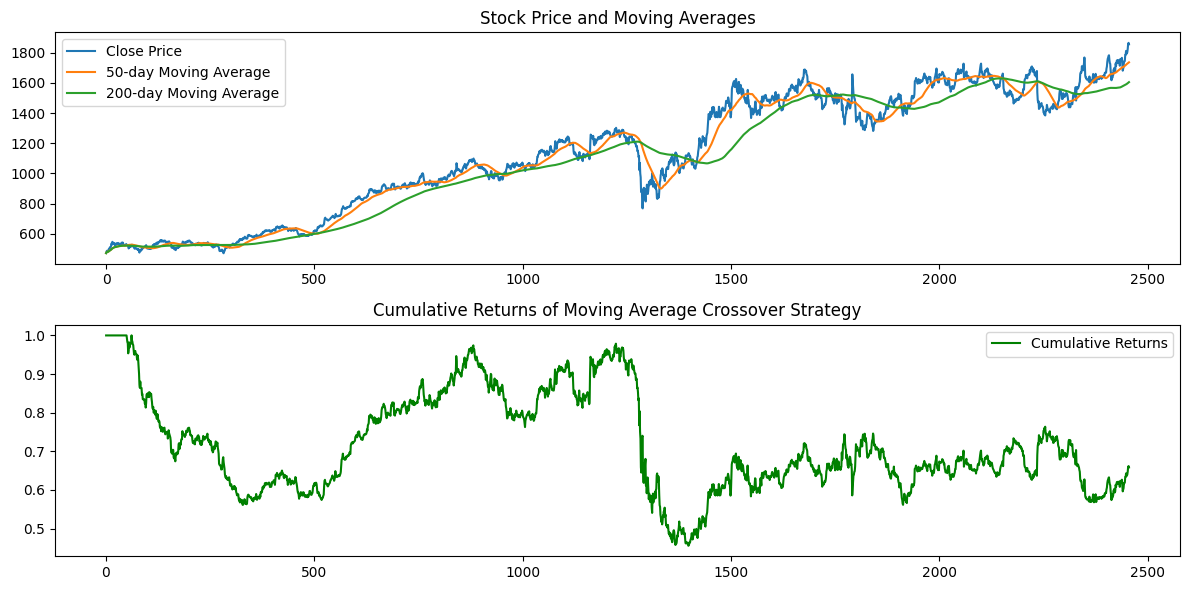

Final Cumulative Return: -0.34
Total Number of Trades: 2406
Winning Trades: 1186
Losing Trades: 1217
Profit Factor: 0.99
Maximum Drawdown: -0.54
Sharpe Ratio: -0.00


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset (replace with your CSV file path)
df = pd.read_csv('HDFC Bank.csv')

# Clean the 'Close' and other numeric columns by removing commas and converting to float
df['Close'] = df['Close'].replace({',': ''}, regex=True).astype(float)

# Ensure 'Date' column is in datetime format
"""df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)"""

# Parameters for the Moving Averages
short_window = 50  # Short-term moving average (e.g., 50-period)
long_window = 200  # Long-term moving average (e.g., 200-period)

# Calculate the Short and Long Moving Averages
df['Short_MA'] = df['Close'].rolling(window=short_window, min_periods=1).mean()
df['Long_MA'] = df['Close'].rolling(window=long_window, min_periods=1).mean()

# Create a column for buy/sell signals: 1 = Buy, -1 = Sell, 0 = Hold
df['Signal'] = 0
df['Signal'][short_window:] = np.where(df['Short_MA'][short_window:] > df['Long_MA'][short_window:], 1, 0)  # Buy Signal
df['Signal'][short_window:] = np.where(df['Short_MA'][short_window:] < df['Long_MA'][short_window:], -1, df['Signal'][short_window:])  # Sell Signal

# Calculate the Returns (Buy at next day's open)
df['Returns'] = df['Close'].pct_change() * df['Signal'].shift(1)  # Returns are based on previous day's signal

# Cumulative returns to see overall strategy performance
df['Cumulative_Returns'] = (1 + df['Returns']).cumprod()

# --- Performance Metrics ---
# Total Return
total_return = df['Cumulative_Returns'].iloc[-1] - 1

# Number of Trades
num_trades = df['Signal'].abs().sum()

# Winning and Losing Trades
winning_trades = df[df['Returns'] > 0].shape[0]
losing_trades = df[df['Returns'] < 0].shape[0]

# Profit Factor
total_profit = df[df['Returns'] > 0]['Returns'].sum()
total_loss = df[df['Returns'] < 0]['Returns'].sum()
profit_factor = total_profit / abs(total_loss) if total_loss != 0 else np.nan

# Maximum Drawdown
running_max = df['Cumulative_Returns'].cummax()
drawdown = (df['Cumulative_Returns'] - running_max) / running_max
max_drawdown = drawdown.min()

# Sharpe Ratio (assuming risk-free rate of 0 for simplicity)
sharpe_ratio = df['Returns'].mean() / df['Returns'].std() if df['Returns'].std() != 0 else np.nan

# Visualize the results
plt.figure(figsize=(12, 6))

# Plot Closing Price and Moving Averages
plt.subplot(2, 1, 1)
plt.plot(df['Close'], label='Close Price')
plt.plot(df['Short_MA'], label=f'{short_window}-day Moving Average')
plt.plot(df['Long_MA'], label=f'{long_window}-day Moving Average')
plt.title('Stock Price and Moving Averages')
plt.legend()

# Plot Cumulative Returns
plt.subplot(2, 1, 2)
plt.plot(df['Cumulative_Returns'], label='Cumulative Returns', color='green')
plt.title('Cumulative Returns of Moving Average Crossover Strategy')
plt.legend()

plt.tight_layout()
plt.show()

# Print the results
print(f"Final Cumulative Return: {total_return:.2f}")
print(f"Total Number of Trades: {num_trades}")
print(f"Winning Trades: {winning_trades}")
print(f"Losing Trades: {losing_trades}")
print(f"Profit Factor: {profit_factor:.2f}")
print(f"Maximum Drawdown: {max_drawdown:.2f}")
print(f"Sharpe Ratio: {sharpe_ratio:.2f}")


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset (replace with your CSV file path)
df = pd.read_csv('HDFC Bank.csv')

# Clean the 'Close' and 'Volume' columns by removing commas and converting to float
df['Close'] = df['Close'].replace({',': ''}, regex=True).astype(float)
df['Volume'] = df['Volume'].replace({',': ''}, regex=True).astype(float)

# Ensure 'Date' column is in datetime format
"""df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)"""

# Parameters for the Moving Averages
short_window = 50  # Short-term moving average (e.g., 50-period)
long_window = 200  # Long-term moving average (e.g., 200-period)
volume_window = 20  # Volume moving average for confirmation
target_pct = 0.02  # Target Price (2% above entry)
stoploss_pct = 0.01  # Stop Loss (1% below entry)

# Calculate the Short and Long Moving Averages
df['Short_MA'] = df['Close'].rolling(window=short_window, min_periods=1).mean()
df['Long_MA'] = df['Close'].rolling(window=long_window, min_periods=1).mean()
df['Volume_MA'] = df['Volume'].rolling(window=volume_window, min_periods=1).mean()

# Initialize variables for backtesting
initial_cash = 10000  # Starting cash in USD
cash = initial_cash
position = 0  # Number of shares held
buy_price = 0  # Price at which the position was bought
target_price = 0  # Target price for the current position
stoploss_price = 0  # Stop loss price for the current position
total_value = []  # To track the total value over time
accuracy_count = 0  # To count profitable trades
total_trades = 0  # To count the number of trades

# Backtest the strategy
for i in range(max(short_window, long_window), len(df)):
    # Check for Buy signal (short MA crosses above long MA, and volume is above its moving average)
    if df['Short_MA'].iloc[i] > df['Long_MA'].iloc[i] and df['Volume'].iloc[i] > df['Volume_MA'].iloc[i]:
        # If not already in position, execute buy order
        if position == 0:
            # Close the previous position if there's an open one (no short selling)
            if position > 0:
                cash += position * df['Close'].iloc[i]  # Sell at current price
                position = 0  # Reset position

            position = cash // df['Close'].iloc[i]  # Buy as many shares as possible with available cash
            cash -= position * df['Close'].iloc[i]  # Deduct cash for the purchase
            buy_price = df['Close'].iloc[i]
            target_price = buy_price * (1 + target_pct)
            stoploss_price = buy_price * (1 - stoploss_pct)
            total_trades += 1

    # If in position, check for exit conditions
    if position > 0:
        # Sell if the price hits the target or stop loss, or if the opposite crossover happens
        if df['Close'].iloc[i] >= target_price or df['Close'].iloc[i] <= stoploss_price:
            cash += position * df['Close'].iloc[i]  # Sell at the current price
            position = 0  # Reset position
            if df['Close'].iloc[i] >= buy_price:  # Check if it's a profitable trade
                accuracy_count += 1  # Count as a winning trade
        # Close the position if the opposite crossover happens (short MA crosses below long MA)
        elif df['Short_MA'].iloc[i] < df['Long_MA'].iloc[i]:
            cash += position * df['Close'].iloc[i]  # Sell at the current price
            position = 0  # Reset position

    # Track the portfolio value (cash + position value)
    total_value.append(cash + position * df['Close'].iloc[i])

# Calculate final profitability
final_value = total_value[-1]
total_return = (final_value - initial_cash) / initial_cash * 100  # Return as percentage
accuracy = accuracy_count / total_trades * 100  # Accuracy as percentage

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(df.index, total_value, label='Portfolio Value')
plt.title('Portfolio Value Over Time')
plt.xlabel('Date')
plt.ylabel('Portfolio Value (USD)')
plt.legend()
plt.show()

# Print the final results
print(f"Initial Cash: ${initial_cash}")
print(f"Final Portfolio Value: ${final_value:.2f}")
print(f"Total Return: {total_return:.2f}%")
print(f"Total Trades: {total_trades}")
print(f"Winning Trades: {accuracy_count}")
print(f"Accuracy: {accuracy:.2f}%")


KeyError: 'Volume'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset (replace with your CSV file path)
df = pd.read_csv('HDFC Bank.csv')

# Clean the 'Close' column by removing commas and converting to float
df['Close'] = df['Close'].replace({',': ''}, regex=True).astype(float)

# Clean the 'Volume' column by removing commas and converting to numeric (handling errors)
df['Volume'] = pd.to_numeric(df['Volume'].replace({',': ''}, regex=True), errors='coerce')

# Ensure 'Date' column is in datetime format
"""df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)"""

# Check for any missing values in the 'Volume' column after cleaning
if df['Volume'].isnull().any():
    print("Warning: There are missing values in the 'Volume' column after cleaning.")
    # Handle missing values (you can choose to fill or drop them)
    df['Volume'].fillna(0, inplace=True)  # Fills missing values with 0 (or choose another method)

# Parameters for the Moving Averages
short_window = 50  # Short-term moving average (e.g., 50-period)
long_window = 200  # Long-term moving average (e.g., 200-period)
volume_window = 20  # Volume moving average for confirmation
target_pct = 0.02  # Target Price (2% above entry)
stoploss_pct = 0.01  # Stop Loss (1% below entry)

# Calculate the Short and Long Moving Averages
df['Short_MA'] = df['Close'].rolling(window=short_window, min_periods=1).mean()
df['Long_MA'] = df['Close'].rolling(window=long_window, min_periods=1).mean()
df['Volume_MA'] = df['Volume'].rolling(window=volume_window, min_periods=1).mean()

# Initialize variables for backtesting
initial_cash = 10000  # Starting cash in USD
cash = initial_cash
position = 0  # Number of shares held
buy_price = 0  # Price at which the position was bought
target_price = 0  # Target price for the current position
stoploss_price = 0  # Stop loss price for the current position
total_value = []  # To track the total value over time
accuracy_count = 0  # To count profitable trades
total_trades = 0  # To count the number of trades

# Backtest the strategy
for i in range(max(short_window, long_window), len(df)):
    # Check for Buy signal (short MA crosses above long MA, and volume is above its moving average)
    if df['Short_MA'].iloc[i] > df['Long_MA'].iloc[i] and df['Volume'].iloc[i] > df['Volume_MA'].iloc[i]:
        # If not already in position, execute buy order
        if position == 0:
            # Close the previous position if there's an open one (no short selling)
            if position > 0:
                cash += position * df['Close'].iloc[i]  # Sell at current price
                position = 0  # Reset position

            position = cash // df['Close'].iloc[i]  # Buy as many shares as possible with available cash
            cash -= position * df['Close'].iloc[i]  # Deduct cash for the purchase
            buy_price = df['Close'].iloc[i]
            target_price = buy_price * (1 + target_pct)
            stoploss_price = buy_price * (1 - stoploss_pct)
            total_trades += 1

    # If in position, check for exit conditions
    if position > 0:
        # Sell if the price hits the target or stop loss, or if the opposite crossover happens
        if df['Close'].iloc[i] >= target_price or df['Close'].iloc[i] <= stoploss_price:
            cash += position * df['Close'].iloc[i]  # Sell at the current price
            position = 0  # Reset position
            if df['Close'].iloc[i] >= buy_price:  # Check if it's a profitable trade
                accuracy_count += 1  # Count as a winning trade
        # Close the position if the opposite crossover happens (short MA crosses below long MA)
        elif df['Short_MA'].iloc[i] < df['Long_MA'].iloc[i]:
            cash += position * df['Close'].iloc[i]  # Sell at the current price
            position = 0  # Reset position

    # Track the portfolio value (cash + position value)
    total_value.append(cash + position * df['Close'].iloc[i])

# Calculate final profitability
final_value = total_value[-1]
total_return = (final_value - initial_cash) / initial_cash * 100  # Return as percentage
accuracy = accuracy_count / total_trades * 100  # Accuracy as percentage

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(df.index, total_value, label='Portfolio Value')
plt.title('Portfolio Value Over Time')
plt.xlabel('Date')
plt.ylabel('Portfolio Value (USD)')
plt.legend()
plt.show()

# Print the final results
print(f"Initial Cash: ${initial_cash}")
print(f"Final Portfolio Value: ${final_value:.2f}")
print(f"Total Return: {total_return:.2f}%")
print(f"Total Trades: {total_trades}")
print(f"Winning Trades: {accuracy_count}")
print(f"Accuracy: {accuracy:.2f}%")


KeyError: 'Volume'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset (replace with your CSV file path)
df = pd.read_csv('HDFC Bank.csv')

# Remove commas from all columns and convert them to numeric
df = df.replace({',': ''}, regex=True)
df['Close'] = df['Close'].astype(float)
df['Open'] = df['Open'].astype(float)
df['High'] = df['High'].astype(float)
df['Low'] = df['Low'].astype(float)
df['Volume'] = df['Volume'].astype(float)
"""df['Volume'] = pd.to_numeric(df['Volume'], errors='coerce')

# Ensure 'Date' column is in datetime format
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)"""

# Check for any missing values after cleaning
if df.isnull().any().any():
    print("Warning: There are missing values in the dataset after cleaning.")
    # Handle missing values (you can choose to fill or drop them)
    df.fillna(method='ffill', inplace=True)  # Forward fill missing values

# Parameters for the Moving Averages
short_window = 50  # Short-term moving average (e.g., 50-period)
long_window = 200  # Long-term moving average (e.g., 200-period)
volume_window = 20  # Volume moving average for confirmation
target_pct = 0.02  # Target Price (2% above entry)
stoploss_pct = 0.01  # Stop Loss (1% below entry)

# Calculate the Short and Long Moving Averages
df['Short_MA'] = df['Close'].rolling(window=short_window, min_periods=1).mean()
df['Long_MA'] = df['Close'].rolling(window=long_window, min_periods=1).mean()
df['Volume_MA'] = df['Volume'].rolling(window=volume_window, min_periods=1).mean()

# Initialize variables for backtesting
initial_cash = 10000  # Starting cash in USD
cash = initial_cash
position = 0  # Number of shares held
buy_price = 0  # Price at which the position was bought
target_price = 0  # Target price for the current position
stoploss_price = 0  # Stop loss price for the current position
total_value = []  # To track the total value over time
accuracy_count = 0  # To count profitable trades
total_trades = 0  # To count the number of trades

# Backtest the strategy
for i in range(max(short_window, long_window), len(df)):
    # Check for Buy signal (short MA crosses above long MA, and volume is above its moving average)
    if df['Short_MA'].iloc[i] > df['Long_MA'].iloc[i] and df['Volume'].iloc[i] > df['Volume_MA'].iloc[i]:
        # If not already in position, execute buy order
        if position == 0:
            # Close the previous position if there's an open one (no short selling)
            if position > 0:
                cash += position * df['Close'].iloc[i]  # Sell at current price
                position = 0  # Reset position

            position = cash // df['Close'].iloc[i]  # Buy as many shares as possible with available cash
            cash -= position * df['Close'].iloc[i]  # Deduct cash for the purchase
            buy_price = df['Close'].iloc[i]
            target_price = buy_price * (1 + target_pct)
            stoploss_price = buy_price * (1 - stoploss_pct)
            total_trades += 1

    # If in position, check for exit conditions
    if position > 0:
        # Sell if the price hits the target or stop loss, or if the opposite crossover happens
        if df['Close'].iloc[i] >= target_price or df['Close'].iloc[i] <= stoploss_price:
            cash += position * df['Close'].iloc[i]  # Sell at the current price
            position = 0  # Reset position
            if df['Close'].iloc[i] >= buy_price:  # Check if it's a profitable trade
                accuracy_count += 1  # Count as a winning trade
        # Close the position if the opposite crossover happens (short MA crosses below long MA)
        elif df['Short_MA'].iloc[i] < df['Long_MA'].iloc[i]:
            cash += position * df['Close'].iloc[i]  # Sell at the current price
            position = 0  # Reset position

    # Track the portfolio value (cash + position value)
    total_value.append(cash + position * df['Close'].iloc[i])

# Calculate final profitability
final_value = total_value[-1]
total_return = (final_value - initial_cash) / initial_cash * 100  # Return as percentage
accuracy = accuracy_count / total_trades * 100  # Accuracy as percentage

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(df.index, total_value, label='Portfolio Value')
plt.title('Portfolio Value Over Time')
plt.xlabel('Date')
plt.ylabel('Portfolio Value (USD)')
plt.legend()
plt.show()

# Print the final results
print(f"Initial Cash: ${initial_cash}")
print(f"Final Portfolio Value: ${final_value:.2f}")
print(f"Total Return: {total_return:.2f}%")
print(f"Total Trades: {total_trades}")
print(f"Winning Trades: {accuracy_count}")
print(f"Accuracy: {accuracy:.2f}%")


KeyError: 'Volume'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset (replace with your CSV file path)
df = pd.read_csv('HDFC Bank.csv')

# Remove commas from all columns and convert them to numeric
df = df.replace({',': ''}, regex=True)
df['Close'] = df['Close'].astype(float)
df['Open'] = df['Open'].astype(float)
df['High'] = df['High'].astype(float)
df['Low'] = df['Low'].astype(float)
df['Volume'] = pd.to_numeric(df['Volume'], errors='coerce')

# Ensure 'Date' column is in datetime format
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Check for any missing values after cleaning
if df.isnull().any().any():
    print("Warning: There are missing values in the dataset after cleaning.")
    # Handle missing values (you can choose to fill or drop them)
    df.fillna(method='ffill', inplace=True)  # Forward fill missing values

# Parameters for the Moving Averages
short_window = 50  # Short-term moving average (e.g., 50-period)
long_window = 200  # Long-term moving average (e.g., 200-period)
target_pct = 0.02  # Target Price (2% above entry)
stoploss_pct = 0.01  # Stop Loss (1% below entry)

# Calculate the Short and Long Moving Averages
df['Short_MA'] = df['Close'].rolling(window=short_window, min_periods=1).mean()
df['Long_MA'] = df['Close'].rolling(window=long_window, min_periods=1).mean()

# Initialize variables for backtesting
initial_cash = 10000  # Starting cash in USD
cash = initial_cash
position = 0  # Number of shares held
buy_price = 0  # Price at which the position was bought
target_price = 0  # Target price for the current position
stoploss_price = 0  # Stop loss price for the current position
total_value = []  # To track the total value over time
accuracy_count = 0  # To count profitable trades
total_trades = 0  # To count the number of trades

# Backtest the strategy
for i in range(max(short_window, long_window), len(df)):
    # Check for Buy signal (short MA crosses above long MA)
    if df['Short_MA'].iloc[i] > df['Long_MA'].iloc[i]:
        # If not already in position, execute buy order
        if position == 0:
            # Close the previous position if there's an open one (no short selling)
            if position > 0:
                cash += position * df['Close'].iloc[i]  # Sell at current price
                position = 0  # Reset position

            position = cash // df['Close'].iloc[i]  # Buy as many shares as possible with available cash
            cash -= position * df['Close'].iloc[i]  # Deduct cash for the purchase
            buy_price = df['Close'].iloc[i]
            target_price = buy_price * (1 + target_pct)
            stoploss_price = buy_price * (1 - stoploss_pct)
            total_trades += 1

    # If in position, check for exit conditions
    if position > 0:
        # Sell if the price hits the target or stop loss, or if the opposite crossover happens
        if df['Close'].iloc[i] >= target_price or df['Close'].iloc[i] <= stoploss_price:
            cash += position * df['Close'].iloc[i]  # Sell at the current price
            position = 0  # Reset position
            if df['Close'].iloc[i] >= buy_price:  # Check if it's a profitable trade
                accuracy_count += 1  # Count as a winning trade
        # Close the position if the opposite crossover happens (short MA crosses below long MA)
        elif df['Short_MA'].iloc[i] < df['Long_MA'].iloc[i]:
            cash += position * df['Close'].iloc[i]  # Sell at the current price
            position = 0  # Reset position

    # Track the portfolio value (cash + position value)
    total_value.append(cash + position * df['Close'].iloc[i])

# Calculate final profitability
final_value = total_value[-1]
total_return = (final_value - initial_cash) / initial_cash * 100  # Return as percentage
accuracy = accuracy_count / total_trades * 100  # Accuracy as percentage

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(df.index, total_value, label='Portfolio Value')
plt.title('Portfolio Value Over Time')
plt.xlabel('Date')
plt.ylabel('Portfolio Value (USD)')
plt.legend()
plt.show()

# Print the final results
print(f"Initial Cash: ${initial_cash}")
print(f"Final Portfolio Value: ${final_value:.2f}")
print(f"Total Return: {total_return:.2f}%")
print(f"Total Trades: {total_trades}")
print(f"Winning Trades: {accuracy_count}")
print(f"Accuracy: {accuracy:.2f}%")


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset (replace with your CSV file path)
df = pd.read_csv('HDFC Bank.csv')

# Remove commas from all columns and convert them to numeric
df = df.replace({',': ''}, regex=True)
df['Close'] = df['Close'].astype(float)
df['Open'] = df['Open'].astype(float)
df['High'] = df['High'].astype(float)
df['Low'] = df['Low'].astype(float)

# Ensure 'Date' column is in datetime format
"""df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)"""

# Check for any missing values after cleaning
if df.isnull().any().any():
    print("Warning: There are missing values in the dataset after cleaning.")
    # Handle missing values (you can choose to fill or drop them)
    df.fillna(method='ffill', inplace=True)  # Forward fill missing values

# Parameters for the Moving Averages
short_window = 50  # Short-term moving average (e.g., 50-period)
long_window = 200  # Long-term moving average (e.g., 200-period)
target_pct = 0.02  # Target Price (2% above entry)
stoploss_pct = 0.01  # Stop Loss (1% below entry)

# Calculate the Short and Long Moving Averages
df['Short_MA'] = df['Close'].rolling(window=short_window, min_periods=1).mean()
df['Long_MA'] = df['Close'].rolling(window=long_window, min_periods=1).mean()

# Initialize variables for backtesting
initial_cash = 10000  # Starting cash in USD
cash = initial_cash
position = 0  # Number of shares held
buy_price = 0  # Price at which the position was bought
target_price = 0  # Target price for the current position
stoploss_price = 0  # Stop loss price for the current position
total_value = []  # To track the total value over time
accuracy_count = 0  # To count profitable trades
total_trades = 0  # To count the number of trades

# Backtest the strategy
for i in range(max(short_window, long_window), len(df)):
    # Check for Buy signal (short MA crosses above long MA)
    if df['Short_MA'].iloc[i] > df['Long_MA'].iloc[i]:
        # If not already in position, execute buy order
        if position == 0:
            # Close the previous position if there's an open one (no short selling)
            if position > 0:
                cash += position * df['Close'].iloc[i]  # Sell at current price
                position = 0  # Reset position

            position = cash // df['Close'].iloc[i]  # Buy as many shares as possible with available cash
            cash -= position * df['Close'].iloc[i]  # Deduct cash for the purchase
            buy_price = df['Close'].iloc[i]
            target_price = buy_price * (1 + target_pct)
            stoploss_price = buy_price * (1 - stoploss_pct)
            total_trades += 1

    # If in position, check for exit conditions
    if position > 0:
        # Sell if the price hits the target or stop loss, or if the opposite crossover happens
        if df['Close'].iloc[i] >= target_price or df['Close'].iloc[i] <= stoploss_price:
            cash += position * df['Close'].iloc[i]  # Sell at the current price
            position = 0  # Reset position
            if df['Close'].iloc[i] >= buy_price:  # Check if it's a profitable trade
                accuracy_count += 1  # Count as a winning trade
        # Close the position if the opposite crossover happens (short MA crosses below long MA)
        elif df['Short_MA'].iloc[i] < df['Long_MA'].iloc[i]:
            cash += position * df['Close'].iloc[i]  # Sell at the current price
            position = 0  # Reset position

    # Track the portfolio value (cash + position value)
    total_value.append(cash + position * df['Close'].iloc[i])

# Calculate final profitability
final_value = total_value[-1]
total_return = (final_value - initial_cash) / initial_cash * 100  # Return as percentage
accuracy = accuracy_count / total_trades * 100  # Accuracy as percentage

"""# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(df.index, total_value, label='Portfolio Value')
plt.title('Portfolio Value Over Time')
plt.xlabel('Date')
plt.ylabel('Portfolio Value (USD)')
plt.legend()
plt.show()"""

# Print the final results
print(f"Initial Cash: {initial_cash}")
print(f"Final Portfolio Value: {final_value:.2f}")
print(f"Total Return: {total_return:.2f}%")
print(f"Total Trades: {total_trades}")
print(f"Winning Trades: {accuracy_count}")
print(f"Accuracy: {accuracy:.2f}%")


Initial Cash: 10000
Final Portfolio Value: 17616.90
Total Return: 76.17%
Total Trades: 315
Winning Trades: 135
Accuracy: 42.86%


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset (replace with your CSV file path)
df = pd.read_csv('HDFC Bank.csv')

# Remove commas from all columns and convert them to numeric
df = df.replace({',': ''}, regex=True)
df['Close'] = df['Close'].astype(float)
df['Open'] = df['Open'].astype(float)
df['High'] = df['High'].astype(float)
df['Low'] = df['Low'].astype(float)

# Ensure 'Date' column is in datetime format
"""df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)"""

# Check for any missing values after cleaning
if df.isnull().any().any():
    print("Warning: There are missing values in the dataset after cleaning.")
    # Handle missing values (you can choose to fill or drop them)
    df.fillna(method='ffill', inplace=True)  # Forward fill missing values

# Parameters for the Moving Averages
short_window = 50  # Short-term moving average (e.g., 50-period)
long_window = 200  # Long-term moving average (e.g., 200-period)
target_pct = 0.02  # Target Price (2% above entry)
stoploss_pct = 0.01  # Stop Loss (1% below entry)

# Calculate the Short and Long Moving Averages
df['Short_MA'] = df['Close'].rolling(window=short_window, min_periods=1).mean()
df['Long_MA'] = df['Close'].rolling(window=long_window, min_periods=1).mean()

# Initialize variables for backtesting
initial_cash = 100  # Starting cash in INR
cash = initial_cash
position = 0  # Number of shares held
buy_price = 0  # Price at which the position was bought
target_price = 0  # Target price for the current position
stoploss_price = 0  # Stop loss price for the current position
total_value = []  # To track the total value over time
accuracy_count = 0  # To count profitable trades
total_trades = 0  # To count the number of trades

# Backtest the strategy
for i in range(max(short_window, long_window), len(df)):
    # Check for Buy signal (short MA crosses above long MA)
    if df['Short_MA'].iloc[i] > df['Long_MA'].iloc[i]:
        # If not already in position, execute buy order (buy only 1 quantity)
        if position == 0:
            # Close the previous position if there's an open one (no short selling)
            if position > 0:
                cash += position * df['Close'].iloc[i]  # Sell at current price
                position = 0  # Reset position

            position = 1  # Buy 1 share
            cash -= df['Close'].iloc[i]  # Deduct cash for the purchase
            buy_price = df['Close'].iloc[i]
            target_price = buy_price * (1 + target_pct)
            stoploss_price = buy_price * (1 - stoploss_pct)
            total_trades += 1

    # If in position, check for exit conditions
    if position > 0:
        # Sell if the price hits the target or stop loss, or if the opposite crossover happens
        if df['Close'].iloc[i] >= target_price or df['Close'].iloc[i] <= stoploss_price:
            cash += position * df['Close'].iloc[i]  # Sell at the current price
            position = 0  # Reset position
            if df['Close'].iloc[i] >= buy_price:  # Check if it's a profitable trade
                accuracy_count += 1  # Count as a winning trade
        # Close the position if the opposite crossover happens (short MA crosses below long MA)
        elif df['Short_MA'].iloc[i] < df['Long_MA'].iloc[i]:
            cash += position * df['Close'].iloc[i]  # Sell at the current price
            position = 0  # Reset position

    # Track the portfolio value (cash + position value)
    total_value.append(cash + position * df['Close'].iloc[i])

# Calculate final profitability
final_value = total_value[-1]
total_return = (final_value - initial_cash) / initial_cash * 100  # Return as percentage
accuracy = accuracy_count / total_trades * 100  # Accuracy as percentage

"""# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(df.index, total_value, label='Portfolio Value')
plt.title('Portfolio Value Over Time')
plt.xlabel('Date')
plt.ylabel('Portfolio Value (INR)')
plt.legend()
plt.show()"""

# Print the final results
print(f"Initial Cash: ₹{initial_cash}")
print(f"Final Portfolio Value: ₹{final_value:.2f}")
print(f"Total Return: {total_return:.2f}%")
print(f"Total Trades: {total_trades}")
print(f"Winning Trades: {accuracy_count}")
print(f"Accuracy: {accuracy:.2f}%")


Initial Cash: ₹100
Final Portfolio Value: ₹869.22
Total Return: 769.22%
Total Trades: 315
Winning Trades: 135
Accuracy: 42.86%


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset (replace with your CSV file path)
df = pd.read_csv('HDFC Bank.csv')

# Remove commas from all columns and convert them to numeric
df = df.replace({',': ''}, regex=True)
df['Close'] = df['Close'].astype(float)
df['Open'] = df['Open'].astype(float)
df['High'] = df['High'].astype(float)
df['Low'] = df['Low'].astype(float)

# Ensure 'Date' column is in datetime format
"""df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)"""

# Check for any missing values after cleaning
if df.isnull().any().any():
    print("Warning: There are missing values in the dataset after cleaning.")
    # Handle missing values (you can choose to fill or drop them)
    df.fillna(method='ffill', inplace=True)  # Forward fill missing values

# Parameters for the Moving Averages
short_window = 50  # Short-term moving average (e.g., 50-period)
long_window = 200  # Long-term moving average (e.g., 200-period)
target_pct = 0.02  # Target Price (2% above entry)
stoploss_pct = 0.01  # Stop Loss (1% below entry)

# Calculate the Short and Long Moving Averages
df['Short_MA'] = df['Close'].rolling(window=short_window, min_periods=1).mean()
df['Long_MA'] = df['Close'].rolling(window=long_window, min_periods=1).mean()

# Initialize variables for backtesting
initial_cash = 100  # Starting cash in INR
cash = initial_cash
position = 0  # Number of shares held
buy_price = 0  # Price at which the position was bought
target_price = 0  # Target price for the current position
stoploss_price = 0  # Stop loss price for the current position
total_value = []  # To track the total value over time
accuracy_count = 0  # To count profitable trades
total_trades = 0  # To count the number of trades

# Backtest the strategy
for i in range(max(short_window, long_window), len(df)):
    # Check for Buy signal (short MA crosses above long MA)
    if df['Short_MA'].iloc[i] > df['Long_MA'].iloc[i]:
        # If not already in position, execute buy order (buy only 1 quantity)
        if position == 0:
            # Ensure enough cash to buy at least 1 share
            if cash >= df['Close'].iloc[i]:
                # Close the previous position if there's an open one (no short selling)
                if position > 0:
                    cash += position * df['Close'].iloc[i]  # Sell at current price
                    position = 0  # Reset position

                position = 1  # Buy 1 share
                cash -= df['Close'].iloc[i]  # Deduct cash for the purchase
                buy_price = df['Close'].iloc[i]
                target_price = buy_price * (1 + target_pct)
                stoploss_price = buy_price * (1 - stoploss_pct)
                total_trades += 1

    # If in position, check for exit conditions
    if position > 0:
        # Sell if the price hits the target or stop loss, or if the opposite crossover happens
        if df['Close'].iloc[i] >= target_price or df['Close'].iloc[i] <= stoploss_price:
            cash += position * df['Close'].iloc[i]  # Sell at the current price
            position = 0  # Reset position
            if df['Close'].iloc[i] >= buy_price:  # Check if it's a profitable trade
                accuracy_count += 1  # Count as a winning trade
        # Close the position if the opposite crossover happens (short MA crosses below long MA)
        elif df['Short_MA'].iloc[i] < df['Long_MA'].iloc[i]:
            cash += position * df['Close'].iloc[i]  # Sell at the current price
            position = 0  # Reset position

    # Track the portfolio value (cash + position value)
    total_value.append(cash + position * df['Close'].iloc[i])

# Calculate final profitability
final_value = total_value[-1]
total_return = (final_value - initial_cash) / initial_cash * 100  # Return as percentage
accuracy = accuracy_count / total_trades * 100  # Accuracy as percentage

"""# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(df.index, total_value, label='Portfolio Value')
plt.title('Portfolio Value Over Time')
plt.xlabel('Date')
plt.ylabel('Portfolio Value (INR)')
plt.legend()
plt.show()"""

# Print the final results
print(f"Initial Cash: ₹{initial_cash}")
print(f"Final Portfolio Value: ₹{final_value:.2f}")
print(f"Total Return: {total_return:.2f}%")
print(f"Total Trades: {total_trades}")
print(f"Winning Trades: {accuracy_count}")
print(f"Accuracy: {accuracy:.2f}%")


ZeroDivisionError: division by zero

Working well

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset (replace with your CSV file path)
df = pd.read_csv('HDFC Bank.csv')

# Remove commas from all columns and convert them to numeric
df = df.replace({',': ''}, regex=True)
df['Close'] = df['Close'].astype(float)
df['Open'] = df['Open'].astype(float)
df['High'] = df['High'].astype(float)
df['Low'] = df['Low'].astype(float)

# Ensure 'Date' column is in datetime format
"""df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)"""

# Check for any missing values after cleaning
if df.isnull().any().any():
    print("Warning: There are missing values in the dataset after cleaning.")
    # Handle missing values (you can choose to fill or drop them)
    df.fillna(method='ffill', inplace=True)  # Forward fill missing values

# Parameters for the Moving Averages
short_window = 50  # Short-term moving average (e.g., 50-period)
long_window = 200  # Long-term moving average (e.g., 200-period)
target_pct = 0.02  # Target Price (2% above entry)
stoploss_pct = 0.01  # Stop Loss (1% below entry)

# Calculate the Short and Long Moving Averages
df['Short_MA'] = df['Close'].rolling(window=short_window, min_periods=1).mean()
df['Long_MA'] = df['Close'].rolling(window=long_window, min_periods=1).mean()

# Initialize variables for backtesting
initial_cash = 1000  # Starting cash in INR
cash = initial_cash
position = 0  # Number of shares held
buy_price = 0  # Price at which the position was bought
target_price = 0  # Target price for the current position
stoploss_price = 0  # Stop loss price for the current position
total_value = []  # To track the total value over time
accuracy_count = 0  # To count profitable trades
total_trades = 0  # To count the number of trades

# Backtest the strategy
for i in range(max(short_window, long_window), len(df)):
    # Check for Buy signal (short MA crosses above long MA)
    if df['Short_MA'].iloc[i] > df['Long_MA'].iloc[i]:
        # If not already in position, execute buy order (buy only 1 quantity)
        if position == 0:
            # Ensure enough cash to buy at least 1 share
            if cash >= df['Close'].iloc[i]:
                # Close the previous position if there's an open one (no short selling)
                if position > 0:
                    cash += position * df['Close'].iloc[i]  # Sell at current price
                    position = 0  # Reset position

                position = 1  # Buy 1 share
                cash -= df['Close'].iloc[i]  # Deduct cash for the purchase
                buy_price = df['Close'].iloc[i]
                target_price = buy_price * (1 + target_pct)
                stoploss_price = buy_price * (1 - stoploss_pct)
                total_trades += 1

    # If in position, check for exit conditions
    if position > 0:
        # Sell if the price hits the target or stop loss, or if the opposite crossover happens
        if df['Close'].iloc[i] >= target_price or df['Close'].iloc[i] <= stoploss_price:
            cash += position * df['Close'].iloc[i]  # Sell at the current price
            position = 0  # Reset position
            if df['Close'].iloc[i] >= buy_price:  # Check if it's a profitable trade
                accuracy_count += 1  # Count as a winning trade
        # Close the position if the opposite crossover happens (short MA crosses below long MA)
        elif df['Short_MA'].iloc[i] < df['Long_MA'].iloc[i]:
            cash += position * df['Close'].iloc[i]  # Sell at the current price
            position = 0  # Reset position

    # Track the portfolio value (cash + position value)
    total_value.append(cash + position * df['Close'].iloc[i])

# Check if any trades were executed
if total_trades == 0:
    print("No trades executed due to insufficient cash.")
else:
    # Calculate final profitability
    final_value = total_value[-1]
    total_return = (final_value - initial_cash) / initial_cash * 100  # Return as percentage
    accuracy = accuracy_count / total_trades * 100  # Accuracy as percentage

    # Print the final results
    print(f"Initial Cash: ₹{initial_cash}")
    print(f"Final Portfolio Value: ₹{final_value:.2f}")
    print(f"Total Return: {total_return:.2f}%")
    print(f"Total Trades: {total_trades}")
    print(f"Winning Trades: {accuracy_count}")
    print(f"Accuracy: {accuracy:.2f}%")


Initial Cash: ₹1000
Final Portfolio Value: ₹949.72
Total Return: -5.03%
Total Trades: 162
Winning Trades: 66
Accuracy: 40.74%


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset (replace with your CSV file path)
df = pd.read_csv('Training_Dataset.csv')

# Remove commas from all columns and convert them to numeric
df = df.replace({',': ''}, regex=True)
df['Close'] = df['Close'].astype(float)
"""df['Open'] = df['Open'].astype(float)
df['High'] = df['High'].astype(float)
df['Low'] = df['Low'].astype(float)"""

# Ensure 'Date' column is in datetime format
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Check for any missing values after cleaning
if df.isnull().any().any():
    print("Warning: There are missing values in the dataset after cleaning.")
    # Handle missing values (you can choose to fill or drop them)
    df.fillna(method='ffill', inplace=True)  # Forward fill missing values

# Parameters for the Moving Averages
short_window = 50  # Short-term moving average (e.g., 50-period)
long_window = 200  # Long-term moving average (e.g., 200-period)
target_pct = 0.02  # Target Price (2% above entry)
stoploss_pct = 0.01  # Stop Loss (1% below entry)

# Calculate the Short and Long Moving Averages
df['Short_MA'] = df['Close'].rolling(window=short_window, min_periods=1).mean()
df['Long_MA'] = df['Close'].rolling(window=long_window, min_periods=1).mean()

# Initialize variables for backtesting
initial_cash = 1000  # Starting cash in INR
cash = initial_cash
position = 0  # Number of shares held
buy_price = 0  # Price at which the position was bought
target_price = 0  # Target price for the current position
stoploss_price = 0  # Stop loss price for the current position
total_value = []  # To track the total value over time
accuracy_count = 0  # To count profitable trades
total_trades = 0  # To count the number of trades
trade_log = []  # To store the trade details for export

# Backtest the strategy
for i in range(max(short_window, long_window), len(df)):
    # Check for Buy signal (short MA crosses above long MA)
    if df['Short_MA'].iloc[i] > df['Long_MA'].iloc[i]:
        # If not already in position, execute buy order (buy only 1 quantity)
        if position == 0:
            # Ensure enough cash to buy at least 1 share
            if cash >= df['Close'].iloc[i]:
                # Close the previous position if there's an open one (no short selling)
                if position > 0:
                    cash += position * df['Close'].iloc[i]  # Sell at current price
                    position = 0  # Reset position

                position = 1  # Buy 1 share
                cash -= df['Close'].iloc[i]  # Deduct cash for the purchase
                buy_price = df['Close'].iloc[i]
                target_price = buy_price * (1 + target_pct)
                stoploss_price = buy_price * (1 - stoploss_pct)
                total_trades += 1
                # Log the buy trade
                trade_log.append({
                    'Date': df.index[i],
                    'Action': 'Buy',
                    'Price': buy_price,
                    'Target_Price': target_price,
                    'Stoploss_Price': stoploss_price,
                    'Trade_Result': 'Bought'  # Updated to 'Bought' for buy action
                })

    # If in position, check for exit conditions
    if position > 0:
        trade_result = ''  # Initialize trade_result before sell logic

        # Sell if the price hits the target or stop loss, or if the opposite crossover happens
        if df['Close'].iloc[i] >= target_price:
            cash += position * df['Close'].iloc[i]  # Sell at the current price
            position = 0  # Reset position
            trade_result = 'Target Hit'
            accuracy_count += 1  # Count as a winning trade
        elif df['Close'].iloc[i] <= stoploss_price:
            cash += position * df['Close'].iloc[i]  # Sell at the current price
            position = 0  # Reset position
            trade_result = 'Stoploss Hit'
        # Close the position if the opposite crossover happens (short MA crosses below long MA)
        elif df['Short_MA'].iloc[i] < df['Long_MA'].iloc[i]:
            cash += position * df['Close'].iloc[i]  # Sell at the current price
            position = 0  # Reset position
            trade_result = 'Crossover'

        # Log the sell trade with result
        trade_log.append({
            'Date': df.index[i],
            'Action': 'Sell',
            'Price': df['Close'].iloc[i],
            'Target_Price': target_price,
            'Stoploss_Price': stoploss_price,
            'Trade_Result': trade_result
        })

    # Track the portfolio value (cash + position value)
    total_value.append(cash + position * df['Close'].iloc[i])

# Check if any trades were executed
if total_trades == 0:
    print("No trades executed due to insufficient cash.")
else:
    # Calculate final profitability
    final_value = total_value[-1]
    total_return = (final_value - initial_cash) / initial_cash * 100  # Return as percentage
    accuracy = accuracy_count / total_trades * 100  # Accuracy as percentage

    # Print the final results
    print(f"Initial Cash: ₹{initial_cash}")
    print(f"Final Portfolio Value: ₹{final_value:.2f}")
    print(f"Total Return: {total_return:.2f}%")
    print(f"Total Trades: {total_trades}")
    print(f"Winning Trades: {accuracy_count}")
    print(f"Accuracy: {accuracy:.2f}%")

# Save the trade log to a new CSV file
trade_df = pd.DataFrame(trade_log)
trade_df.to_csv('trade_log_with_results.csv', index=False)
print("Trade log with results has been saved to 'trade_log_with_results.csv'.")


Initial Cash: ₹1000
Final Portfolio Value: ₹660.05
Total Return: -34.00%
Total Trades: 573
Winning Trades: 152
Accuracy: 26.53%
Trade log with results has been saved to 'trade_log_with_results.csv'.


Working Well 2

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset (replace with your CSV file path)
df = pd.read_csv('Training_Dataset.csv')

# Remove commas from all columns and convert them to numeric
df = df.replace({',': ''}, regex=True)
df['Close'] = df['Close'].astype(float)
"""df['Open'] = df['Open'].astype(float)
df['High'] = df['High'].astype(float)
df['Low'] = df['Low'].astype(float)"""

# Ensure 'Date' column is in datetime format
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Check for any missing values after cleaning
if df.isnull().any().any():
    print("Warning: There are missing values in the dataset after cleaning.")
    # Handle missing values (you can choose to fill or drop them)
    df.fillna(method='ffill', inplace=True)  # Forward fill missing values

# Parameters for the Moving Averages
short_window = 5  # Short-term moving average (e.g., 50-period)
long_window = 50  # Long-term moving average (e.g., 200-period)
target_pct = 0.02  # Target Price (2% above entry)
stoploss_pct = 0.01  # Stop Loss (1% below entry)

# Calculate the Short and Long Moving Averages
df['Short_MA'] = df['Close'].rolling(window=short_window, min_periods=1).mean()
df['Long_MA'] = df['Close'].rolling(window=long_window, min_periods=1).mean()

# Initialize variables for backtesting
initial_cash = 2000  # Starting cash in INR
cash = initial_cash
position = 0  # Number of shares held
buy_price = 0  # Price at which the position was bought
target_price = 0  # Target price for the current position
stoploss_price = 0  # Stop loss price for the current position
total_value = []  # To track the total value over time
accuracy_count = 0  # To count profitable trades
total_trades = 0  # To count the number of trades
trade_log = []  # To store the trade details for export

# Backtest the strategy
for i in range(max(short_window, long_window), len(df)):
    # Check for Buy signal (short MA crosses above long MA)
    if df['Short_MA'].iloc[i] > df['Long_MA'].iloc[i]:
        # If not already in position, execute buy order (buy only 1 quantity)
        if position == 0:
            # Ensure enough cash to buy at least 1 share
            if cash >= df['Close'].iloc[i]:
                # Close the previous position if there's an open one (no short selling)
                if position > 0:
                    cash += position * df['Close'].iloc[i]  # Sell at current price
                    position = 0  # Reset position

                position = 1  # Buy 1 share
                cash -= df['Close'].iloc[i]  # Deduct cash for the purchase
                buy_price = df['Close'].iloc[i]
                target_price = buy_price * (1 + target_pct)
                stoploss_price = buy_price * (1 - stoploss_pct)
                total_trades += 1
                # Log the buy trade
                trade_log.append({
                    'Date': df.index[i],
                    'Action': 'Buy',
                    'Price': buy_price,
                    'Target_Price': target_price,
                    'Stoploss_Price': stoploss_price,
                    'Trade_Result': 'Bought'  # Updated to 'Bought' for buy action
                })

    # If in position, check for exit conditions
    if position > 0:
        trade_result = ''  # Initialize trade_result before sell logic

        # Sell if the price hits the target or stop loss, or if the opposite crossover happens
        if df['Close'].iloc[i] >= target_price:
            cash += position * df['Close'].iloc[i]  # Sell at the current price
            position = 0  # Reset position
            trade_result = 'Target Hit'
            accuracy_count += 1  # Count as a winning trade
        elif df['Close'].iloc[i] <= stoploss_price:
            cash += position * df['Close'].iloc[i]  # Sell at the current price
            position = 0  # Reset position
            trade_result = 'Stoploss Hit'
        # Close the position if the opposite crossover happens (short MA crosses below long MA)
        elif df['Short_MA'].iloc[i] < df['Long_MA'].iloc[i]:
            cash += position * df['Close'].iloc[i]  # Sell at the current price
            position = 0  # Reset position
            trade_result = 'Crossover'

        # Log the sell trade with result, only if a trade has occurred (i.e., not empty result)
        if trade_result != '':
            trade_log.append({
                'Date': df.index[i],
                'Action': 'Sell',
                'Price': df['Close'].iloc[i],
                'Target_Price': target_price,
                'Stoploss_Price': stoploss_price,
                'Trade_Result': trade_result
            })

    # Track the portfolio value (cash + position value)
    total_value.append(cash + position * df['Close'].iloc[i])

# Check if any trades were executed
if total_trades == 0:
    print("No trades executed due to insufficient cash.")
else:
    # Calculate final profitability
    final_value = total_value[-1]
    total_return = (final_value - initial_cash) / initial_cash * 100  # Return as percentage
    accuracy = accuracy_count / total_trades * 100  # Accuracy as percentage

    # Print the final results
    print(f"Initial Cash: ₹{initial_cash}")
    print(f"Final Portfolio Value: ₹{final_value:.2f}")
    print(f"Total Return: {total_return:.2f}%")
    print(f"Total Trades: {total_trades}")
    print(f"Winning Trades: {accuracy_count}")
    print(f"Accuracy: {accuracy:.2f}%")

# Save the trade log to a new CSV file
trade_df = pd.DataFrame(trade_log)
trade_df.to_csv('trade_log_with_results_4.csv', index=False)
print("Trade log with results has been saved to 'trade_log_with_results_4.csv'.")


Initial Cash: ₹2000
Final Portfolio Value: ₹1460.65
Total Return: -26.97%
Total Trades: 1513
Winning Trades: 290
Accuracy: 19.17%
Trade log with results has been saved to 'trade_log_with_results_3.csv'.


EMA Working for 15 minute time chartframe

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset (replace with your CSV file path)
df = pd.read_csv('Training_Dataset.csv')

# Remove commas from all columns and convert them to numeric
df = df.replace({',': ''}, regex=True)
df['Close'] = df['Close'].astype(float)
"""df['Open'] = df['Open'].astype(float)
df['High'] = df['High'].astype(float)
df['Low'] = df['Low'].astype(float)"""

# Ensure 'Date' column is in datetime format
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Check for any missing values after cleaning
if df.isnull().any().any():
    print("Warning: There are missing values in the dataset after cleaning.")
    # Handle missing values (you can choose to fill or drop them)
    df.fillna(method='ffill', inplace=True)  # Forward fill missing values

# Parameters for the Moving Averages
short_window = 9  # Short-term moving average (e.g., 50-period)
long_window = 21  # Long-term moving average (e.g., 200-period)
target_pct = 0.01  # Target Price (2% above entry)
stoploss_pct = 0.005  # Stop Loss (1% below entry)

# Calculate the Short and Long Moving Averages (EMA)
df['Short_MA'] = df['Close'].ewm(span=short_window, adjust=False).mean()
df['Long_MA'] = df['Close'].ewm(span=long_window, adjust=False).mean()

# Initialize variables for backtesting
initial_cash = 2000  # Starting cash in INR
cash = initial_cash
position = 0  # Number of shares held
buy_price = 0  # Price at which the position was bought
target_price = 0  # Target price for the current position
stoploss_price = 0  # Stop loss price for the current position
total_value = []  # To track the total value over time
accuracy_count = 0  # To count profitable trades
total_trades = 0  # To count the number of trades
trade_log = []  # To store the trade details for export

# Backtest the strategy
for i in range(max(short_window, long_window), len(df)):
    # Check for Buy signal (short MA crosses above long MA)
    if df['Short_MA'].iloc[i] > df['Long_MA'].iloc[i]:
        # If not already in position, execute buy order (buy only 1 quantity)
        if position == 0:
            # Ensure enough cash to buy at least 1 share
            if cash >= df['Close'].iloc[i]:
                # Close the previous position if there's an open one (no short selling)
                if position > 0:
                    cash += position * df['Close'].iloc[i]  # Sell at current price
                    position = 0  # Reset position

                position = 1  # Buy 1 share
                cash -= df['Close'].iloc[i]  # Deduct cash for the purchase
                buy_price = df['Close'].iloc[i]
                target_price = buy_price * (1 + target_pct)
                stoploss_price = buy_price * (1 - stoploss_pct)
                total_trades += 1
                # Log the buy trade
                trade_log.append({
                    'Date': df.index[i],
                    'Action': 'Buy',
                    'Price': buy_price,
                    'Target_Price': target_price,
                    'Stoploss_Price': stoploss_price,
                    'Trade_Result': 'Bought'  # Updated to 'Bought' for buy action
                })

    # If in position, check for exit conditions
    if position > 0:
        trade_result = ''  # Initialize trade_result before sell logic

        # Sell if the price hits the target or stop loss, or if the opposite crossover happens
        if df['Close'].iloc[i] >= target_price:
            cash += position * df['Close'].iloc[i]  # Sell at the current price
            position = 0  # Reset position
            trade_result = 'Target Hit'
            accuracy_count += 1  # Count as a winning trade
        elif df['Close'].iloc[i] <= stoploss_price:
            cash += position * df['Close'].iloc[i]  # Sell at the current price
            position = 0  # Reset position
            trade_result = 'Stoploss Hit'
        # Close the position if the opposite crossover happens (short MA crosses below long MA)
        elif df['Short_MA'].iloc[i] < df['Long_MA'].iloc[i]:
            cash += position * df['Close'].iloc[i]  # Sell at the current price
            position = 0  # Reset position
            trade_result = 'Crossover'

        # Log the sell trade with result, only if a trade has occurred (i.e., not empty result)
        if trade_result != '':
            trade_log.append({
                'Date': df.index[i],
                'Action': 'Sell',
                'Price': df['Close'].iloc[i],
                'Target_Price': target_price,
                'Stoploss_Price': stoploss_price,
                'Trade_Result': trade_result
            })

    # Track the portfolio value (cash + position value)
    total_value.append(cash + position * df['Close'].iloc[i])

# Check if any trades were executed
if total_trades == 0:
    print("No trades executed due to insufficient cash.")
else:
    # Calculate final profitability
    final_value = total_value[-1]
    total_return = (final_value - initial_cash) / initial_cash * 100  # Return as percentage
    accuracy = accuracy_count / total_trades * 100  # Accuracy as percentage

    # Print the final results
    print(f"Initial Cash: ₹{initial_cash}")
    print(f"Final Portfolio Value: ₹{final_value:.2f}")
    print(f"Total Return: {total_return:.2f}%")
    print(f"Total Trades: {total_trades}")
    print(f"Winning Trades: {accuracy_count}")
    print(f"Accuracy: {accuracy:.2f}%")

# Save the trade log to a new CSV file
trade_df = pd.DataFrame(trade_log)
trade_df.to_csv('trade_log_with_results_4.csv', index=False)
print("Trade log with results has been saved to 'trade_log_with_results_4.csv'.")

Initial Cash: ₹2000
Final Portfolio Value: ₹1361.45
Total Return: -31.93%
Total Trades: 2897
Winning Trades: 807
Accuracy: 27.86%
Trade log with results has been saved to 'trade_log_with_results_4.csv'.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset (replace with your CSV file path)
df = pd.read_csv('HDFC Bank.csv')

# Remove commas from all columns and convert them to numeric
df = df.replace({',': ''}, regex=True)
df['Close'] = df['Close'].astype(float)
df['Open'] = df['Open'].astype(float)
df['High'] = df['High'].astype(float)
df['Low'] = df['Low'].astype(float)

# Ensure 'Date' column is in datetime format
"""df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)"""

# Check for any missing values after cleaning
if df.isnull().any().any():
    print("Warning: There are missing values in the dataset after cleaning.")
    # Handle missing values (you can choose to fill or drop them)
    df.fillna(method='ffill', inplace=True)  # Forward fill missing values

# Parameters for AMA
short_window = 50  # Look-back period for short AMA
long_window = 200  # Look-back period for long AMA
fast_smoothing = 2 / (2 + 1)  # Fast smoothing factor (e.g., 2-period EMA)
slow_smoothing = 2 / (30 + 1)  # Slow smoothing factor (e.g., 30-period EMA)
target_pct = 0.02  # Target Price (2% above entry)
stoploss_pct = 0.01  # Stop Loss (1% below entry)

# Function to calculate AMA
def calculate_ama(series, window, fast, slow):
    efficiency_ratio = abs(series.diff(window)) / series.diff().abs().rolling(window).sum()
    smoothing_constant = (efficiency_ratio * (fast - slow) + slow) ** 2
    ama = series.copy()
    for i in range(1, len(series)):
        ama.iloc[i] = ama.iloc[i - 1] + smoothing_constant.iloc[i] * (series.iloc[i] - ama.iloc[i - 1])
    return ama

# Calculate the Short and Long Adaptive Moving Averages
df['Short_AMA'] = calculate_ama(df['Close'], short_window, fast_smoothing, slow_smoothing)
df['Long_AMA'] = calculate_ama(df['Close'], long_window, fast_smoothing, slow_smoothing)

# Initialize variables for backtesting
initial_cash = 1000  # Starting cash in INR
cash = initial_cash
position = 0  # Number of shares held
buy_price = 0  # Price at which the position was bought
target_price = 0  # Target price for the current position
stoploss_price = 0  # Stop loss price for the current position
total_value = []  # To track the total value over time
accuracy_count = 0  # To count profitable trades
total_trades = 0  # To count the number of trades

# Backtest the strategy
for i in range(max(short_window, long_window), len(df)):
    # Check for Buy signal (short AMA crosses above long AMA)
    if df['Short_AMA'].iloc[i] > df['Long_AMA'].iloc[i]:
        # If not already in position, execute buy order (buy only 1 quantity)
        if position == 0:
            # Ensure enough cash to buy at least 1 share
            if cash >= df['Close'].iloc[i]:
                # Close the previous position if there's an open one (no short selling)
                if position > 0:
                    cash += position * df['Close'].iloc[i]  # Sell at current price
                    position = 0  # Reset position

                position = 1  # Buy 1 share
                cash -= df['Close'].iloc[i]  # Deduct cash for the purchase
                buy_price = df['Close'].iloc[i]
                target_price = buy_price * (1 + target_pct)
                stoploss_price = buy_price * (1 - stoploss_pct)
                total_trades += 1

    # If in position, check for exit conditions
    if position > 0:
        # Sell if the price hits the target or stop loss, or if the opposite crossover happens
        if df['Close'].iloc[i] >= target_price or df['Close'].iloc[i] <= stoploss_price:
            cash += position * df['Close'].iloc[i]  # Sell at the current price
            position = 0  # Reset position
            if df['Close'].iloc[i] >= buy_price:  # Check if it's a profitable trade
                accuracy_count += 1  # Count as a winning trade
        # Close the position if the opposite crossover happens (short AMA crosses below long AMA)
        elif df['Short_AMA'].iloc[i] < df['Long_AMA'].iloc[i]:
            cash += position * df['Close'].iloc[i]  # Sell at the current price
            position = 0  # Reset position

    # Track the portfolio value (cash + position value)
    total_value.append(cash + position * df['Close'].iloc[i])

# Check if any trades were executed
if total_trades == 0:
    print("No trades executed due to insufficient cash.")
else:
    # Calculate final profitability
    final_value = total_value[-1]
    total_return = (final_value - initial_cash) / initial_cash * 100  # Return as percentage
    accuracy = accuracy_count / total_trades * 100  # Accuracy as percentage

    # Print the final results
    print(f"Initial Cash: ₹{initial_cash}")
    print(f"Final Portfolio Value: ₹{final_value:.2f}")
    print(f"Total Return: {total_return:.2f}%")
    print(f"Total Trades: {total_trades}")
    print(f"Winning Trades: {accuracy_count}")
    print(f"Accuracy: {accuracy:.2f}%")


No trades executed due to insufficient cash.


In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset (replace with your CSV file path)
df = pd.read_csv('TAMO 2.csv')

# Remove commas from all columns and convert them to numeric
df = df.replace({',': ''}, regex=True)
df['Close'] = df['Close'].astype(float)
df['Open'] = df['Open'].astype(float)
df['High'] = df['High'].astype(float)
df['Low'] = df['Low'].astype(float)

# Ensure 'Date' column is in datetime format
"""df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)"""

# Check for any missing values after cleaning
if df.isnull().any().any():
    print("Warning: There are missing values in the dataset after cleaning.")
    # Handle missing values (you can choose to fill or drop them)
    df.fillna(method='ffill', inplace=True)  # Forward fill missing values

# Parameters for the Moving Averages
short_window = 20  # Short-term moving average (e.g., 50-period)
long_window = 50  # Long-term moving average (e.g., 200-period)
target_pct = 0.02  # Target Price (2% above entry)
stoploss_pct = 0.01  # Stop Loss (1% below entry)

# Calculate the Short and Long Moving Averages
df['Short_MA'] = df['Close'].ewm(span=short_window, adjust=False).mean()
df['Long_MA'] = df['Close'].ewm(span=long_window, adjust=False).mean()

# Initialize variables for backtesting
initial_cash = 1000  # Starting cash in INR
cash = initial_cash
position = 0  # Number of shares held
buy_price = 0  # Price at which the position was bought
target_price = 0  # Target price for the current position
stoploss_price = 0  # Stop loss price for the current position
total_value = []  # To track the total value over time
accuracy_count = 0  # To count profitable trades
total_trades = 0  # To count the number of trades

# Backtest the strategy
for i in range(max(short_window, long_window), len(df)):
    # Check for Buy signal (short MA crosses above long MA)
    if df['Short_MA'].iloc[i] > df['Long_MA'].iloc[i]:
        # If not already in position, execute buy order (buy only 1 quantity)
        if position == 0:
            # Ensure enough cash to buy at least 1 share
            if cash >= df['Close'].iloc[i]:
                # Close the previous position if there's an open one (no short selling)
                if position > 0:
                    cash += position * df['Close'].iloc[i]  # Sell at current price
                    position = 0  # Reset position

                position = 1  # Buy 1 share
                cash -= df['Close'].iloc[i]  # Deduct cash for the purchase
                buy_price = df['Close'].iloc[i]
                target_price = buy_price * (1 + target_pct)
                stoploss_price = buy_price * (1 - stoploss_pct)
                total_trades += 1

    # If in position, check for exit conditions
    if position > 0:
        # Sell if the price hits the target or stop loss, or if the opposite crossover happens
        if df['Close'].iloc[i] >= target_price or df['Close'].iloc[i] <= stoploss_price:
            cash += position * df['Close'].iloc[i]  # Sell at the current price
            position = 0  # Reset position
            if df['Close'].iloc[i] >= buy_price:  # Check if it's a profitable trade
                accuracy_count += 1  # Count as a winning trade
        # Close the position if the opposite crossover happens (short MA crosses below long MA)
        elif df['Short_MA'].iloc[i] < df['Long_MA'].iloc[i]:
            cash += position * df['Close'].iloc[i]  # Sell at the current price
            position = 0  # Reset position

    # Track the portfolio value (cash + position value)
    total_value.append(cash + position * df['Close'].iloc[i])

# Check if any trades were executed
if total_trades == 0:
    print("No trades executed due to insufficient cash.")
else:
    # Calculate final profitability
    final_value = total_value[-1]
    total_return = (final_value - initial_cash) / initial_cash * 100  # Return as percentage
    accuracy = accuracy_count / total_trades * 100  # Accuracy as percentage

    # Print the final results
    print(f"Initial Cash: ₹{initial_cash}")
    print(f"Final Portfolio Value: ₹{final_value:.2f}")
    print(f"Total Return: {total_return:.2f}%")
    print(f"Total Trades: {total_trades}")
    print(f"Winning Trades: {accuracy_count}")
    print(f"Accuracy: {accuracy:.2f}%")


Initial Cash: ₹1000
Final Portfolio Value: ₹1495.63
Total Return: 49.56%
Total Trades: 192
Winning Trades: 93
Accuracy: 48.44%


In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset (replace with your CSV file path)
df = pd.read_csv('TAMO 2.csv')

# Remove commas from all columns and convert them to numeric
df = df.replace({',': ''}, regex=True)
df['Close'] = df['Close'].astype(float)
df['Open'] = df['Open'].astype(float)
df['High'] = df['High'].astype(float)
df['Low'] = df['Low'].astype(float)

# Ensure 'Date' column is in datetime format
"""df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)"""

# Parameters for the Moving Averages
short_window = 50  # Short-term EMA (e.g., 50-period)
long_window = 200  # Long-term EMA (e.g., 200-period)
target_pct = 0.02  # Target Price (2% above entry)
stoploss_pct = 0.005  # Stop Loss (1% below entry)

# Calculate the Short and Long Exponential Moving Averages (EMAs)
df['Short_EMA'] = df['Close'].ewm(span=short_window, adjust=False).mean()
df['Long_EMA'] = df['Close'].ewm(span=long_window, adjust=False).mean()

# Initialize variables for backtesting
initial_cash = 1000  # Starting cash in INR
cash = initial_cash
position = 0  # Number of shares held
buy_price = 0  # Price at which the position was bought
target_price = 0  # Target price for the current position
stoploss_price = 0  # Stop loss price for the current position
total_value = []  # To track the total value over time
accuracy_count = 0  # To count profitable trades
total_trades = 0  # To count the number of trades
trade_log = []  # To store the trade details for export

# Backtest the strategy
for i in range(max(short_window, long_window), len(df)):
    # Check for Buy signal (short EMA crosses above long EMA)
    if df['Short_EMA'].iloc[i] > df['Long_EMA'].iloc[i]:
        # If not already in position, execute buy order (buy only 1 quantity)
        if position == 0:
            # Ensure enough cash to buy at least 1 share
            if cash >= df['Close'].iloc[i]:
                position = 1  # Buy 1 share
                cash -= df['Close'].iloc[i]  # Deduct cash for the purchase
                buy_price = df['Close'].iloc[i]
                target_price = buy_price * (1 + target_pct)
                stoploss_price = buy_price * (1 - stoploss_pct)
                total_trades += 1
                # Log the buy trade
                trade_log.append({
                    'Date': df.index[i],
                    'Action': 'Buy',
                    'Price': buy_price,
                    'Target_Price': target_price,
                    'Stoploss_Price': stoploss_price,
                    'Trade_Result': 'Bought'
                })

    # If in position, check for exit conditions
    if position > 0:
        trade_result = ''  # Initialize trade_result before sell logic

        # Sell if the price hits the target or stop loss, or if the opposite crossover happens
        if df['Close'].iloc[i] >= target_price:
            cash += position * df['Close'].iloc[i]  # Sell at the current price
            position = 0  # Reset position
            trade_result = 'Target Hit'
            accuracy_count += 1  # Count as a winning trade
        elif df['Close'].iloc[i] <= stoploss_price:
            cash += position * df['Close'].iloc[i]  # Sell at the current price
            position = 0  # Reset position
            trade_result = 'Stoploss Hit'
        # Close the position if the opposite crossover happens (short EMA crosses below long EMA)
        elif df['Short_EMA'].iloc[i] < df['Long_EMA'].iloc[i]:
            cash += position * df['Close'].iloc[i]  # Sell at the current price
            position = 0  # Reset position
            trade_result = 'Crossover'

        # Log the sell trade with result, only if a trade has occurred (i.e., not empty result)
        if trade_result != '':
            trade_log.append({
                'Date': df.index[i],
                'Action': 'Sell',
                'Price': df['Close'].iloc[i],
                'Target_Price': target_price,
                'Stoploss_Price': stoploss_price,
                'Trade_Result': trade_result
            })

    # Track the portfolio value (cash + position value)
    total_value.append(cash + position * df['Close'].iloc[i])

# Check if any trades were executed
if total_trades == 0:
    print("No trades executed due to insufficient cash.")
else:
    # Calculate final profitability
    final_value = total_value[-1]
    total_return = (final_value - initial_cash) / initial_cash * 100  # Return as percentage
    accuracy = accuracy_count / total_trades * 100  # Accuracy as percentage

    # Print the final results
    print(f"Initial Cash: ₹{initial_cash}")
    print(f"Final Portfolio Value: ₹{final_value:.2f}")
    print(f"Total Return: {total_return:.2f}%")
    print(f"Total Trades: {total_trades}")
    print(f"Winning Trades: {accuracy_count}")
    print(f"Accuracy: {accuracy:.2f}%")

# Save the trade log to a new CSV file
"""trade_df = pd.DataFrame(trade_log)
trade_df.to_csv('ema_trade_log_with_results.csv', index=False)
print("Trade log with results has been saved to 'ema_trade_log_with_results.csv'.")"""


Initial Cash: ₹1000
Final Portfolio Value: ₹1368.62
Total Return: 36.86%
Total Trades: 221
Winning Trades: 88
Accuracy: 39.82%


'trade_df = pd.DataFrame(trade_log)\ntrade_df.to_csv(\'ema_trade_log_with_results.csv\', index=False)\nprint("Trade log with results has been saved to \'ema_trade_log_with_results.csv\'.")'